# Import libraries

In [1]:
# Dependencies
import matplotlib.pyplot as plt
import requests
import pandas as pd
from config import api_key
import json
import numpy as np
from citipy import citipy
from scipy.stats import linregress
import datetime

# Generate random list for latitudes and longitudes

In [2]:
#Generate random list for latitudes and longitudes
np.random.seed(99)
latitude=[lat for lat in np.random.randint(-90,90,2000)]
longitude=[lon for lon in np.random.randint(-180,180,2000)]

In [3]:
latitude_and_Longitude = tuple(zip(latitude,longitude))

# Find Nearest City

In [4]:
#use citipy library to find the nearest city for all latitudes and longitudes
cities = []
countries = []

for lat, lon in latitude_and_Longitude:
    city = citipy.nearest_city(lat,lon)
    city_name = city.city_name
    cities.append(city_name)
    countries.append(city.country_code)

## Generate Dataframe for all information

In [5]:
city_df = pd.DataFrame({'City': cities, 'Country': countries})
city_df = city_df.drop_duplicates(subset=['City'],keep='first')
city_df['Date']=""
city_df['Latitude'] = ''
city_df['Longitude'] = ''
city_df['Max Temperature (F)'] = ''
city_df['Humidity (%)'] = ''
city_df['Cloudiness (%)'] = ''
city_df['Wind Speed (mph)'] = ''
city_df.head()

,City,Country,Date,Latitude,Longitude,Max Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,ericeira,pt,,,,,,,
1,souillac,mu,,,,,,,
2,illoqqortoormiut,gl,,,,,,,
3,bengkulu,id,,,,,,,
4,liverpool,ca,,,,,,,


## Perform Openweathermap API calls

In [6]:
url="http://api.openweathermap.org/data/2.5/weather?q="
units="imperial"

In [7]:
for index, row in city_df.iterrows():
    city = row['City']
    country_code = row['Country']
    query_url = url + city + ',' + country_code + '&units=' + units + '&APPID=' + api_key
    weather_response = requests.get(query_url)
    weather_json = weather_response.json()

    try:
        print(f"Processing Record {index}, City Name: {city}.")
        city_df.loc[index,'Date']=datetime.datetime.fromtimestamp(weather_json['dt'])
        city_df.loc[index,'Latitude']=weather_json['coord']['lat']
        city_df.loc[index,'Longitude']=weather_json['coord']['lon']
        city_df.loc[index,'Max Temperature (F)']=weather_json['main']['temp_max']
        city_df.loc[index, 'Humidity (%)']=weather_json['main']['humidity']
        city_df.loc[index, 'Cloudiness (%)']=weather_json['clouds']['all']
        city_df.loc[index, 'Wind Speed (mph)']=weather_json['wind']['speed']
        
    
    except:
        print(f"Oops, Record {index} city: {city} not found! ")

print("-----------------------------")        
print("Data Retrieval Complete")
print("-----------------------------")

Processing Record 0, City Name: ericeira.
Processing Record 1, City Name: souillac.
Processing Record 2, City Name: illoqqortoormiut.
Oops, Record 2 city: illoqqortoormiut not found! 
Processing Record 3, City Name: bengkulu.
Processing Record 4, City Name: liverpool.
Processing Record 5, City Name: ileza.
Processing Record 6, City Name: busselton.
Processing Record 7, City Name: port lincoln.
Processing Record 8, City Name: chokurdakh.
Processing Record 9, City Name: flinders.
Processing Record 10, City Name: saint-francois.
Processing Record 11, City Name: erie.
Processing Record 12, City Name: campbell river.
Processing Record 13, City Name: yellowknife.
Processing Record 14, City Name: chuy.
Processing Record 15, City Name: dubbo.
Processing Record 16, City Name: mount gambier.
Processing Record 17, City Name: samusu.
Oops, Record 17 city: samusu not found! 
Processing Record 18, City Name: castro.
Processing Record 19, City Name: punta arenas.
Processing Record 20, City Name: yula

Processing Record 245, City Name: puerto escondido.
Processing Record 247, City Name: araioses.
Processing Record 248, City Name: saint-augustin.
Processing Record 249, City Name: collie.
Processing Record 250, City Name: guerrero negro.
Processing Record 251, City Name: amderma.
Oops, Record 251 city: amderma not found! 
Processing Record 252, City Name: bairiki.
Processing Record 253, City Name: bowen.
Processing Record 254, City Name: san quintin.
Processing Record 258, City Name: irbeyskoye.
Processing Record 259, City Name: cochrane.
Processing Record 262, City Name: naze.
Processing Record 263, City Name: new norfolk.
Processing Record 265, City Name: rjukan.
Processing Record 266, City Name: saskylakh.
Processing Record 267, City Name: bafra.
Processing Record 270, City Name: telimele.
Processing Record 271, City Name: palauig.
Processing Record 272, City Name: fukue.
Processing Record 273, City Name: srednekolymsk.
Processing Record 276, City Name: alta floresta.
Processing Rec

Processing Record 592, City Name: khani.
Oops, Record 592 city: khani not found! 
Processing Record 593, City Name: kichera.
Processing Record 594, City Name: san felipe.
Processing Record 597, City Name: yhu.
Processing Record 600, City Name: evensk.
Processing Record 605, City Name: temaraia.
Oops, Record 605 city: temaraia not found! 
Processing Record 606, City Name: yerbogachen.
Processing Record 612, City Name: guia de isora.
Processing Record 614, City Name: georgetown.
Processing Record 617, City Name: lodja.
Processing Record 622, City Name: meadow lake.
Processing Record 623, City Name: ulaangom.
Processing Record 634, City Name: lafia.
Processing Record 635, City Name: arman.
Processing Record 636, City Name: kitgum.
Processing Record 638, City Name: azare.
Processing Record 643, City Name: skibbereen.
Processing Record 650, City Name: sorland.
Processing Record 651, City Name: codrington.
Oops, Record 651 city: codrington not found! 
Processing Record 652, City Name: upingt

Processing Record 1144, City Name: amos.
Processing Record 1149, City Name: mangan.
Processing Record 1150, City Name: moscow.
Processing Record 1151, City Name: ucluelet.
Processing Record 1156, City Name: hami.
Processing Record 1157, City Name: skegness.
Processing Record 1163, City Name: nuzvid.
Processing Record 1164, City Name: aketi.
Processing Record 1170, City Name: nova olimpia.
Processing Record 1172, City Name: bata.
Processing Record 1175, City Name: makakilo city.
Processing Record 1179, City Name: yauya.
Processing Record 1188, City Name: frederiksvaerk.
Processing Record 1189, City Name: nicoya.
Processing Record 1190, City Name: mutsamudu.
Oops, Record 1190 city: mutsamudu not found! 
Processing Record 1191, City Name: muli.
Processing Record 1197, City Name: luau.
Processing Record 1202, City Name: mitsamiouli.
Processing Record 1205, City Name: boa vista.
Processing Record 1208, City Name: necochea.
Processing Record 1210, City Name: komsomolskiy.
Processing Record 1

Processing Record 1675, City Name: lagos.
Processing Record 1677, City Name: vanimo.
Processing Record 1679, City Name: waw.
Oops, Record 1679 city: waw not found! 
Processing Record 1680, City Name: beian.
Oops, Record 1680 city: beian not found! 
Processing Record 1682, City Name: zhigansk.
Processing Record 1685, City Name: bahir dar.
Processing Record 1686, City Name: effium.
Processing Record 1700, City Name: sao felix do xingu.
Processing Record 1701, City Name: zaraza.
Processing Record 1702, City Name: nishihara.
Processing Record 1704, City Name: chifeng.
Processing Record 1724, City Name: thinadhoo.
Processing Record 1726, City Name: san vicente.
Processing Record 1728, City Name: gazni.
Oops, Record 1728 city: gazni not found! 
Processing Record 1730, City Name: mezen.
Processing Record 1736, City Name: quiruvilca.
Processing Record 1737, City Name: saryshagan.
Oops, Record 1737 city: saryshagan not found! 
Processing Record 1738, City Name: vanavara.
Processing Record 1739,

In [8]:
#change all data recieved from openweathermap api to numerical data
city_df['Latitude'] = pd.to_numeric(city_df['Latitude'])
city_df['Longitude'] = pd.to_numeric(city_df['Longitude'])
city_df['Max Temperature (F)'] = pd.to_numeric(city_df['Max Temperature (F)'])
city_df['Humidity (%)'] = pd.to_numeric(city_df['Humidity (%)'])
city_df['Cloudiness (%)'] = pd.to_numeric(city_df['Cloudiness (%)'])
city_df['Wind Speed (mph)'] = pd.to_numeric(city_df['Wind Speed (mph)'])

In [9]:
#remove rows and columns with None values
new_city_df=city_df[city_df['Date'] != ""]
new_city_df.reset_index(inplace=True)
del new_city_df['index']
print("We have {} cities containing weather information.".format(len(new_city_df)))

We have 661 cities containing weather information.


### Export DataFrame to CSV File

In [10]:
new_city_df.to_csv("weatherpy_data.csv", encoding="utf-8", index=False)

#  Build scatter plots to showcase the following relationships:
* Temperature (F) vs. Latitude
* Humidity (%) vs. Latitude
* Cloudiness (%) vs. Latitude
* Wind Speed (mph) vs. Latitude

### Temperature (F) vs. Latitude

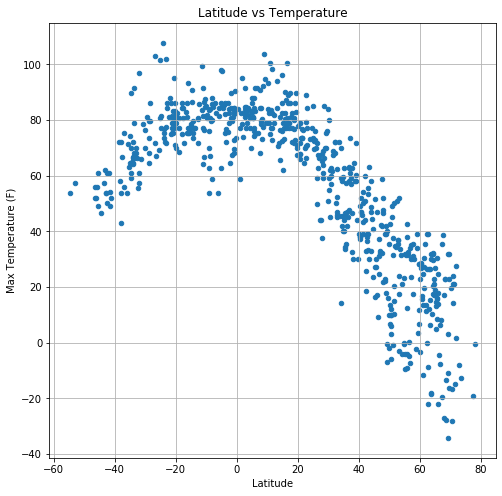

In [11]:
#Temperature (F) vs. Latitude
new_city_df.plot(kind="scatter", x="Latitude", y="Max Temperature (F)", grid=True, figsize=(8,8),
              title="Latitude vs Temperature") 
plt.savefig("City Latitude vs Temperature.jpeg")
plt.show()

#### The plot shows that the cities near the equator have higher temperatures and the cities which are far away from the equator have lower temperature.

### Humidity (%) vs. Latitude

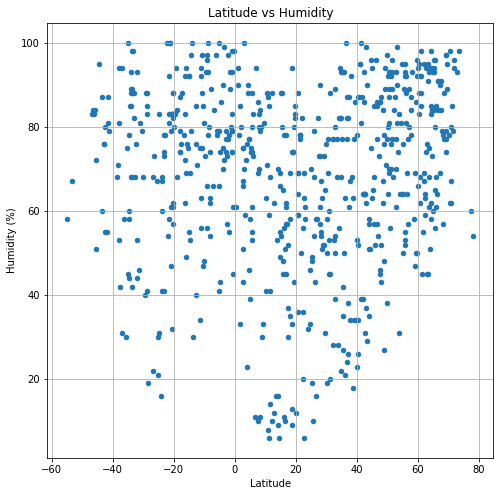

In [12]:
#Humidity (%) vs. Latitude
new_city_df.plot(kind="scatter", x="Latitude", y="Humidity (%)", grid=True, figsize=(8,8),
              title="Latitude vs Humidity") 
plt.savefig("City Latitude vs Humidity.jpeg")
plt.show()

#### The plot shows that there is no real pattern that can describe the relationship between latitude and humidity

### Cloudiness (%) vs. Latitude

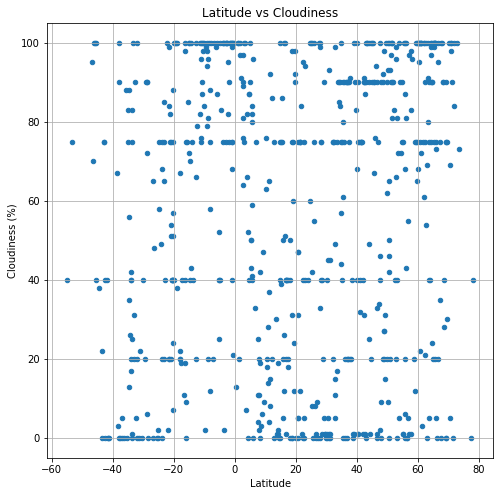

In [13]:
#Cloudiness (%) vs. Latitude
new_city_df.plot(kind="scatter", x="Latitude", y="Cloudiness (%)", grid=True, figsize=(8,8),
              title="Latitude vs Cloudiness") 
plt.savefig("City Latitude vs Cloudiness.jpeg")
plt.show()

#### The plot shows that there is no real pattern that can describe the relationship between latitude and Cloudiness

### Wind Speed (mph) vs. Latitude

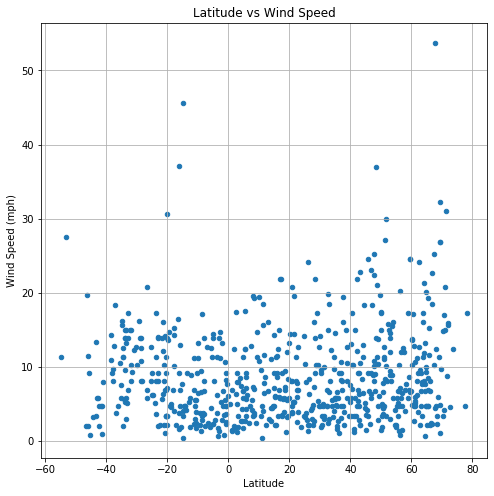

In [14]:
#Wind Speed (mph) vs. Latitude
new_city_df.plot(kind="scatter", x="Latitude", y="Wind Speed (mph)", grid=True, figsize=(8,8),
              title="Latitude vs Wind Speed") 
plt.savefig("City Latitude vs Wind Speed.jpeg")
plt.show()

#### The plot shows that there is no real pattern that can describe the relationship between latitude and windspeed

## Perform linear regression on each relationship

* Northern Hemisphere - Temperature (F) vs. Latitude
* Southern Hemisphere - Temperature (F) vs. Latitude
* Northern Hemisphere - Humidity (%) vs. Latitude
* Southern Hemisphere - Humidity (%) vs. Latitude
* Northern Hemisphere - Cloudiness (%) vs. Latitude
* Southern Hemisphere - Cloudiness (%) vs. Latitude
* Northern Hemisphere - Wind Speed (mph) vs. Latitude
* Southern Hemisphere - Wind Speed (mph) vs. Latitude

In [15]:
Northern_Hemisphere=new_city_df[new_city_df['Latitude']>0]
Southern_Hemisphere=new_city_df[new_city_df['Latitude']<0]

Regression line equation is: y = -1.3x + 96.39
The r-squared is: -0.89
The regression displays a negative correlation.
In the Northern hemisphere, as the cities get closer to the equator, the temperature decreases.


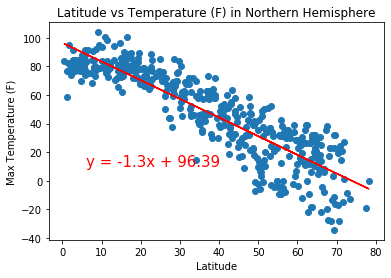

In [16]:
#Northern Hemisphere - Temperature (F) vs. Latitude
x_values = Northern_Hemisphere['Latitude']
y_values = Northern_Hemisphere['Max Temperature (F)']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title("Latitude vs Temperature (F) in Northern Hemisphere")
print(f"Regression line equation is: {line_eq}")
print(f"The r-squared is: {round(rvalue, 2)}")
print("The regression displays a negative correlation.")
print("In the Northern hemisphere, as the cities get closer to the equator, the temperature decreases.")
plt.savefig("Northern Hemisphere - Latitude vs Temperature (F).jpeg")
plt.show()

Regression line equation is: y = 0.5x + 85.42
The r-squared is: 0.56
The regression displays a positive correlation.
In the Southern hemisphere, as the cities get closer to the equator, the temperature increases.


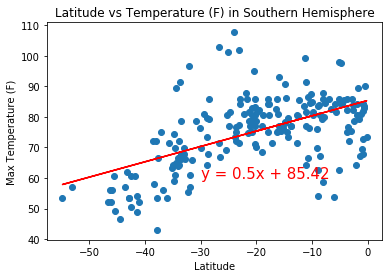

In [17]:
#Southern Hemisphere - Temperature (F) vs. Latitude
x_values = Southern_Hemisphere['Latitude']
y_values = Southern_Hemisphere['Max Temperature (F)']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,60),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title("Latitude vs Temperature (F) in Southern Hemisphere")
print(f"Regression line equation is: {line_eq}")
print(f"The r-squared is: {round(rvalue, 2)}")
print("The regression displays a positive correlation.")
print("In the Southern hemisphere, as the cities get closer to the equator, the temperature increases.")
plt.savefig("Southern Hemisphere - Latitude vs Temperature (F).jpeg")
plt.show()

The r-squared is: 0.33
The regression is generally considered a None or Very weak relationship between latitude and humidity


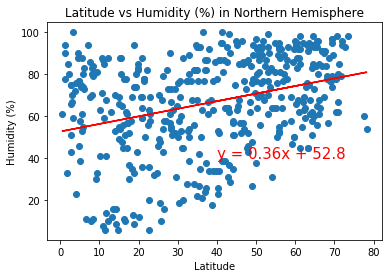

In [18]:
#Northern Hemisphere - Humidity (%) vs. Latitude
x_values = Northern_Hemisphere['Latitude']
y_values = Northern_Hemisphere['Humidity (%)']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,40),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title("Latitude vs Humidity (%) in Northern Hemisphere")
print(f"The r-squared is: {round(rvalue, 2)}")
print("The regression is generally considered a None or Very weak relationship between latitude and humidity") 
plt.savefig("Northern Hemisphere - Latitude vs Humidity (%).jpeg")
plt.show()

The r-squared is: 0.13
The regression is generally considered a None or Very weak relationship between latitude and humidity


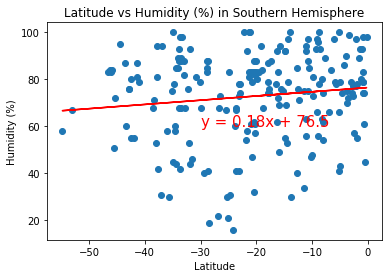

In [19]:
#Southern Hemisphere - Humidity (%) vs. Latitude
x_values = Southern_Hemisphere['Latitude']
y_values = Southern_Hemisphere['Humidity (%)']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,60),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title("Latitude vs Humidity (%) in Southern Hemisphere")
print(f"The r-squared is: {round(rvalue, 2)}")
print("The regression is generally considered a None or Very weak relationship between latitude and humidity") 
plt.savefig("Southern Hemisphere - Latitude vs Humidity (%).jpeg")
plt.show()

The r-squared is: 0.2
The regression is generally considered a None or Very weak relationship between latitude and cloudiness


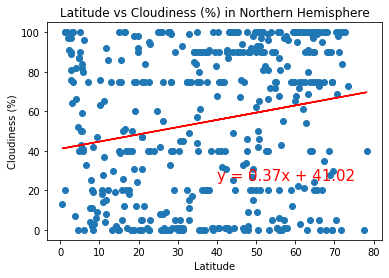

In [20]:
#Northern Hemisphere - Cloudiness (%) vs. Latitude
x_values = Northern_Hemisphere['Latitude']
y_values = Northern_Hemisphere['Cloudiness (%)']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,25),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title("Latitude vs Cloudiness (%) in Northern Hemisphere")
print(f"The r-squared is: {round(rvalue, 2)}")
print("The regression is generally considered a None or Very weak relationship between latitude and cloudiness") 
plt.savefig("Northern Hemisphere - Latitude vs Cloudiness (%).jpeg")
plt.show()

The r-squared is: 0.39
The regression is generally considered a None or Very weak relationship between latitude and Cloudiness. Although not obvious, there is a weak linear relationship between cloundiness and latitude: As latitute increases, cloudiness increases.


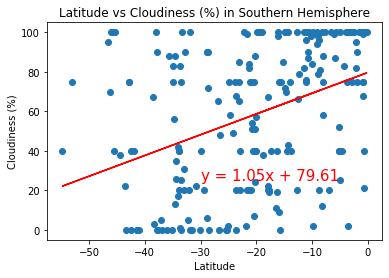

In [21]:
#Southern Hemisphere - Cloudiness (%) vs. Latitude
x_values = Southern_Hemisphere['Latitude']
y_values = Southern_Hemisphere['Cloudiness (%)']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,25),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title("Latitude vs Cloudiness (%) in Southern Hemisphere")
print(f"The r-squared is: {round(rvalue, 2)}")
print("The regression is generally considered a None or Very weak relationship between latitude and Cloudiness. \
Although not obvious, there is a weak linear relationship between cloundiness and latitude: As latitute increases, cloudiness increases.") 
plt.savefig("Southern Hemisphere - Latitude vs Cloudiness (%).jpeg")
plt.show()

The r-squared is: 0.2
The regression is generally considered a None or Very weak relationship between latitude and wind speed


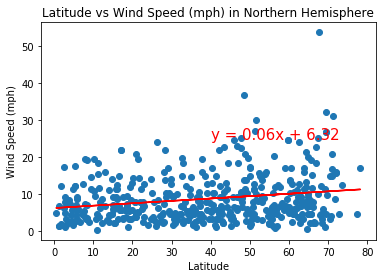

In [22]:
#Northern Hemisphere - Wind Speed (mph) vs. Latitude
x_values = Northern_Hemisphere['Latitude']
y_values = Northern_Hemisphere['Wind Speed (mph)']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,25),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title("Latitude vs Wind Speed (mph) in Northern Hemisphere")
print(f"The r-squared is: {round(rvalue, 2)}")
print("The regression is generally considered a None or Very weak relationship between latitude and wind speed") 
plt.savefig("Northern Hemisphere - Latitude vs Wind Speed (mph).jpeg")
plt.show()

The r-squared is: -0.19
The regression is generally considered a None or Very weak relationship between latitude and wind speed


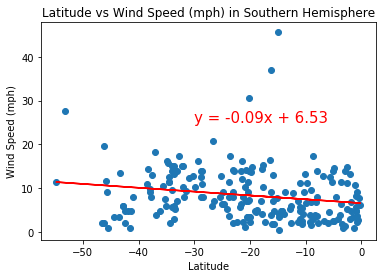

In [23]:
#Southern Hemisphere - Wind Speed (mph) vs. Latitude
x_values = Southern_Hemisphere['Latitude']
y_values = Southern_Hemisphere['Wind Speed (mph)']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,25),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title("Latitude vs Wind Speed (mph) in Southern Hemisphere")
print(f"The r-squared is: {round(rvalue, 2)}")
print("The regression is generally considered a None or Very weak relationship between latitude and wind speed") 
plt.savefig("Southern Hemisphere - Latitude vs Wind Speed (mph).jpeg")
plt.show()

# Observations

* Temperature correlates well with the latitude. As latitude moves away from equator, temperature decreases
* It seems that there is no relationship between latitude and humidity. 
* Even though there is very low correlation between latitude and wind speed, wind speed tends to be higher near arctic and antarctic